# MPS canonical forms 

In [14]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:

import numpy as np
from tensornetwork import ncon
import logging

import copy 

from myMPSstuff import myMPS, randMPS
from myMPOstuff import myMPO, randMPO, isingMPO

from matrixUtils import checkIdMatrix

from applMPOMPS import applyMPOtoMPS


logging.basicConfig()
logger = logging.getLogger('Something')
logger.setLevel(logging.DEBUG)

In [16]:

test2 = myMPS(randMPS(chi=200))
print(f"Entropies=  {test2.getEntropies()}")


MPS with length 10 and physical d=2
chi [1, 200, 200, 200, 200, 200, 200, 200, 200, 200, 1]
Entropies=  [0.0, 0.0007796035758451088, 0.0003943557446954149, 0.0007694910691817312, 0.0003404877637843445, 0.0005831493093520493, 0.00021117710379840808, 0.0006012569185665346, 0.0006427030093367449, 0.005883650422771164, 0.0]


In [17]:

testMPO = myMPO(isingMPO(LL=10, J = 1, g = 0.4))
print(testMPO.getIndices())

Ising MPO, parameters: J=1 g=0.4,  shapes:
[(1, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 1, 2, 2)]
MPO with length 10 and physical d=2
chi [1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1]
[[951, 1, 11, 952], [952, 2, 12, 953], [953, 3, 13, 954], [954, 4, 14, 955], [955, 5, 15, 956], [956, 6, 16, 957], [957, 7, 17, 958], [958, 8, 18, 959], [959, 9, 19, 960], [960, 10, 20, 961]]


In [18]:
test = myMPS()  # This should spit out a logger message from console

mpstest = np.random.rand(4,7,3,7)

test = myMPS(mpstest)

print(test.getIndices())

test.updatePhysIndices([9,9,9,9])

test.updateEdgeIndices([999,999])

print(test.getIndices())

print(test.getNorm())



MPS with length 7 and physical d=2
chi [1, 20, 20, 20, 20, 20, 20, 1]
MPS with length 4 and physical d=3
chi [7, 7, 7, 7, 7]
[[21, 1, 22], [22, 2, 23], [23, 3, 24], [24, 4, 25]]
[[999, 9, 22], [22, 9, 23], [23, 9, 24], [24, 9, 999]]
1441910.075615249


In [19]:


test3 = myMPS(randMPS(LL=20, chi=200))
print(f"Entropies=  {test3.getEntropies()}")

testMPO = myMPO()
print(testMPO.getIndices())



MPS with length 20 and physical d=2
chi [1, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 1]
Entropies=  [0.0, 0.0042503383498021605, 0.0006000295579973591, 0.0007933952159018645, 0.0008372869030627497, 0.0009484313919038004, 0.0005519203017440932, 0.0004453138932441249, 0.0005040326486668797, 0.0009127171251663469, 0.00040469511768201414, 0.0006536724602675777, 0.0007568394894115162, 9.536580071213937e-05, 0.0006202771166915785, 0.0006150444852406763, 0.00042559846313471305, 0.0003821528130221137, 0.0006086042754874874, 0.007334784136722864, 0.0]
MPO with length 7 and physical d=2
chi [1, 5, 5, 5, 5, 5, 5, 1]
[[666, 1, 8, 667], [667, 2, 9, 668], [668, 3, 10, 669], [669, 4, 11, 670], [670, 5, 12, 671], [671, 6, 13, 672], [672, 7, 14, 673]]


## Check that we're actually in proper L-R canon forms by contracting a bit and see if we recover identity matrices and normalizations 

In [20]:
mymps3 = myMPS(randMPS(6))

aaa = mymps3.bringCan(mode='LR',epsTrunc=1e-6)
bbb = mymps3.bringCan(mode='L')

# So now the MPS should be normalized and in  LEFT canonical form 
# Check by contracting some A's 

print(f"Norm={mymps3.getNorm()}")

mp = mymps3.MPS
sv = mymps3.SV
svinv = [svv**(-1) for svv in sv ]

for m in mp:
    checkIdMatrix(ncon([m,np.conj(m)],[[1,2,-1],[1,2,-2]]))

# Looks good 

# Now try and build the B's using the recipe 
#Bj = (L_{j-1})^-1 @ Aj @ Lj


print("")

for j in range(0,len(mp)):
    #print(j,np.shape(svinv[j]),  np.shape(mp[j]), np.shape(sv[j+1]))
    mb = ncon([np.diag(svinv[j]),  mp[j] ,  np.diag(sv[j+1]) ], [[-1,1],[1,-2,2],[2,-3]])
    checkIdMatrix(ncon([mb,np.conj(mb)],[[-1,1,2],[-2,1,2]]))


# Also looks good. 



MPS with length 6 and physical d=2
chi [1, 5, 5, 5, 5, 5, 1]
Norm=1.0000000000000002
identity, size = 2
identity, size = 4
identity, size = 5
identity, size = 4
identity, size = 2
identity, size = 1

identity, size = 1
identity, size = 2
identity, size = 4
identity, size = 5
identity, size = 4
identity, size = 2


## Try computing an expectation value, first the "hard" way (ncon the whole thing), then using the right-canonical expression

In [21]:
# Try to do it a bit better, define separately psi and psi*
# and compute the norm 

testL = 7
testd = 2
testChi = 5

mps1 = randMPS(testL,chi=testChi, d=testd)

mypsi = myMPS(mps1, offIndices=30)
mypsic = myMPS(np.conj(mps1), offIndices=50)

copymypsi = copy.deepcopy(mypsi)

# Now define the operator to exp-value

# Say we wanna compute <sigma_x> 
op1 = np.array([[0,1.],[1.,0]])

# at site r = 3 

psiOpens =  [1,2, 66, 4,5,6,7]
psicOpens = [1,2, 67, 4,5,6,7]
op1Opens = [66,67]

mypsi.updatePhysIndices(psiOpens)
mypsic.updatePhysIndices(psicOpens)

mypsi.updateEdgeIndices([-1,-2])
mypsic.updateEdgeIndices([-3,-4])

mtocon = [m for m in mypsi.MPS]
[mtocon.append(m) for m in mypsic.MPS]

mtocon = [m for m in mypsi.MPS]
[mtocon.append(m) for m in mypsic.MPS]
mtocon.append(op1)

print(len(mtocon),len(mypsi.MPS),len(mypsic.MPS),len(op1))

#itocon = mypsi.getIndices()
itocon = [idx for idx in mypsi.getIndices()]
[itocon.append(idx) for idx in mypsic.getIndices()]
itocon.append(op1Opens)

print(itocon)
print(len(itocon),len(mtocon))

tnc = ncon( mtocon, itocon)

mtocon[-1] = np.eye(2)

norm = ncon(mtocon, itocon )

print("Exp value done the hard way: ")
print(np.real_if_close(tnc/norm))



print(" Now compute it with the canonical form ")

copymypsi.bringCan(mode='R',epsTrunc=1e-12)

conTen = [np.diag(copymypsi.SV[2]),np.diag(copymypsi.SV[2]),copymypsi.MPS[2],np.conj(copymypsi.MPS[2]),op1]
conIdx = [[1,2],[1,3],[3,4,5],[2,6,5],[4,6]]

[print(np.shape(elem)) for elem in conTen]
print(len(conTen),len(conIdx))

print(np.real_if_close(ncon(conTen,conIdx)))


MPS with length 7 and physical d=2
chi [1, 5, 5, 5, 5, 5, 5, 1]
MPS with length 7 and physical d=2
chi [1, 5, 5, 5, 5, 5, 5, 1]
15 7 7 2
[[-1, 1, 212], [212, 2, 213], [213, 66, 214], [214, 4, 215], [215, 5, 216], [216, 6, 217], [217, 7, -2], [-3, 1, 352], [352, 2, 353], [353, 67, 354], [354, 4, 355], [355, 5, 356], [356, 6, 357], [357, 7, -4], [66, 67]]
15 15
Exp value done the hard way: 
[[[[0.99552056]]]]
 Now compute it with the canonical form 
(4, 4)
(4, 4)
(4, 2, 5)
(4, 2, 5)
(2, 2)
5 5
0.9955205587134393


/var/folders/jz/kz6llp3d33xdg4k3pprgcxyc0000gn/T/ipykernel_98626/3307051872.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mypsic = myMPS(np.conj(mps1), offIndices=50)


# The canonical form Gamma-Lambda 

Let's build it from our LR sweep
and check that we get the same results for our MPS 

In [22]:
#TODO: still to implement checks here, but it should work I guess 

# Apply MPO to MPS operations 


In [23]:

o = myMPO(isingMPO(20))

Ising MPO, parameters: J=1.0 g=0.5,  shapes:
[(1, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 1, 2, 2)]
MPO with length 20 and physical d=2
chi [1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1]


In [25]:
LLL = 30

psi = myMPS(randMPS(LLL))

o = myMPO(isingMPO(LLL))

opsi = applyMPOtoMPS(o, psi)

ents = opsi.getEntropies()
#print(f"Entropies = {ents}")
emid = ents[LLL//2]

de = 1.

iter = []
devec = []

#while de > 0.01:
for j in range(1,300):
    opsi = applyMPOtoMPS(o, opsi, chiMax = 40)  # Should return it already canonical
    enew = opsi.getEntropies()[LLL//2]
    de = emid - enew
    #print(f"Entropies: {emid, enew, de}")
    devec.append(de)
    iter.append(j)
    emid = enew
    print(j, opsi.chis)

#print(devec)




MPS with length 30 and physical d=2
chi [1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1]
Ising MPO, parameters: J=1.0 g=0.5,  shapes:
[(1, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 1, 2, 2)]
MPO with length 30 and physical d=2
chi [1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1]
MPS with length 30 and physical d=2
chi [1, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 

1 [1, 2, 4, 8, 16, 28, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 84, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 96, 48, 24, 12, 6, 1]


2 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


3 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


4 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


5 [1, 2, 4, 8, 16, 29, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 87, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


6 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


7 [1, 2, 4, 8, 15, 28, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 84, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


8 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


9 [1, 2, 4, 8, 14, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


10 [1, 2, 4, 8, 15, 27, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


11 [1, 2, 4, 8, 14, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


12 [1, 2, 4, 7, 14, 25, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 42, 75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


13 [1, 2, 4, 8, 14, 25, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


14 [1, 2, 4, 7, 14, 25, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 42, 75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


15 [1, 2, 4, 8, 14, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


16 [1, 2, 4, 7, 12, 21, 38, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 36, 63, 114, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


17 [1, 2, 4, 8, 14, 24, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 72, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


18 [1, 2, 4, 7, 12, 22, 38, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 36, 66, 114, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


19 [1, 2, 4, 7, 13, 24, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 72, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


20 [1, 2, 4, 7, 12, 20, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 36, 60, 117, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


21 [1, 2, 4, 7, 13, 21, 36, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 63, 108, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


22 [1, 2, 4, 6, 11, 20, 36, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 33, 60, 108, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


23 [1, 2, 4, 6, 9, 17, 33, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 27, 51, 99, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


24 [1, 2, 3, 5, 10, 19, 35, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 9, 15, 30, 57, 105, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


25 [1, 2, 4, 7, 10, 19, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 30, 57, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


26 [1, 2, 4, 7, 11, 19, 34, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 33, 57, 102, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


27 [1, 2, 4, 6, 11, 20, 36, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 33, 60, 108, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


28 [1, 2, 3, 5, 10, 18, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 9, 15, 30, 54, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


29 [1, 2, 4, 6, 10, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 30, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


30 [1, 2, 4, 4, 8, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 12, 24, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


31 [1, 2, 3, 5, 9, 16, 31, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 9, 15, 27, 48, 93, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


32 [1, 1, 2, 4, 8, 16, 31, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 3, 6, 12, 24, 48, 93, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


33 [1, 2, 4, 8, 14, 25, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


34 [1, 2, 4, 8, 15, 28, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 84, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


35 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


36 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


37 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


38 [1, 2, 4, 8, 16, 29, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 87, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


39 [1, 2, 4, 8, 15, 27, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


40 [1, 2, 4, 8, 14, 28, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 84, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


41 [1, 2, 4, 8, 15, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


42 [1, 2, 4, 8, 15, 27, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


43 [1, 2, 4, 7, 14, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 42, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


44 [1, 2, 4, 8, 15, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


45 [1, 2, 4, 7, 13, 23, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 69, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


46 [1, 2, 4, 7, 14, 27, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 42, 81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


47 [1, 2, 4, 7, 13, 25, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


48 [1, 2, 4, 8, 15, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


49 [1, 2, 4, 7, 13, 22, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 66, 117, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


50 [1, 2, 4, 7, 13, 22, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 66, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


51 [1, 2, 4, 8, 15, 24, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 72, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


52 [1, 2, 4, 7, 12, 22, 38, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 36, 66, 114, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


53 [1, 2, 4, 7, 11, 20, 38, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 33, 60, 114, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


54 [1, 2, 4, 7, 12, 20, 36, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 36, 60, 108, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


55 [1, 2, 4, 7, 11, 20, 36, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 33, 60, 108, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


56 [1, 2, 4, 6, 11, 19, 36, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 33, 57, 108, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


57 [1, 2, 4, 7, 10, 18, 35, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 30, 54, 105, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


58 [1, 2, 4, 6, 11, 19, 35, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 33, 57, 105, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


59 [1, 2, 3, 6, 11, 20, 37, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 9, 18, 33, 60, 111, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


60 [1, 2, 4, 5, 8, 16, 29, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 15, 24, 48, 87, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


61 [1, 2, 4, 7, 10, 17, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 30, 51, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


62 [1, 2, 4, 5, 10, 18, 33, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 15, 30, 54, 99, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


63 [1, 2, 4, 5, 9, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 15, 27, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


64 [1, 2, 3, 5, 9, 17, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 9, 15, 27, 51, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


65 [1, 2, 3, 5, 8, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 9, 15, 24, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


66 [1, 1, 2, 4, 8, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 3, 6, 12, 24, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


67 [1, 2, 4, 8, 15, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


68 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


69 [1, 2, 4, 8, 16, 29, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 87, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


70 [1, 2, 4, 8, 16, 31, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 93, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


71 [1, 2, 4, 8, 16, 31, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 93, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


72 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


73 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


74 [1, 2, 4, 8, 15, 28, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 84, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


75 [1, 2, 4, 8, 15, 27, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


76 [1, 2, 4, 8, 14, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


77 [1, 2, 4, 8, 14, 25, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


78 [1, 2, 4, 8, 14, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


79 [1, 2, 4, 7, 13, 23, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 69, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


80 [1, 2, 4, 7, 14, 27, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 42, 81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


81 [1, 2, 4, 8, 13, 25, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 39, 75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


82 [1, 2, 4, 7, 13, 24, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 72, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


83 [1, 2, 4, 7, 12, 23, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 36, 69, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


84 [1, 2, 4, 7, 12, 23, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 36, 69, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


85 [1, 2, 4, 8, 14, 24, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 72, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


86 [1, 2, 4, 7, 13, 24, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 72, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


87 [1, 2, 4, 6, 11, 20, 37, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 33, 60, 111, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


88 [1, 2, 4, 6, 11, 22, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 33, 66, 117, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


89 [1, 2, 4, 7, 13, 20, 37, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 60, 111, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


90 [1, 2, 4, 7, 12, 23, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 36, 69, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


91 [1, 2, 4, 7, 11, 20, 36, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 33, 60, 108, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


92 [1, 2, 4, 6, 11, 22, 37, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 33, 66, 111, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


93 [1, 2, 3, 5, 10, 19, 36, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 9, 15, 30, 57, 108, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


94 [1, 2, 4, 8, 11, 19, 34, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 33, 57, 102, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


95 [1, 2, 4, 6, 9, 18, 33, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 27, 54, 99, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


96 [1, 2, 4, 6, 9, 17, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 27, 51, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


97 [1, 2, 3, 5, 9, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 9, 15, 27, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


98 [1, 1, 2, 4, 8, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 3, 6, 12, 24, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


99 [1, 2, 4, 8, 15, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


100 [1, 2, 4, 8, 16, 31, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 93, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


101 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


102 [1, 2, 4, 8, 16, 31, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 93, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


103 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


104 [1, 2, 4, 8, 16, 29, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 87, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


105 [1, 2, 4, 8, 15, 28, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 84, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


106 [1, 2, 4, 8, 15, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


107 [1, 2, 4, 8, 15, 27, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


108 [1, 2, 4, 8, 14, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


109 [1, 2, 4, 8, 14, 25, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


110 [1, 2, 4, 8, 13, 25, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 39, 75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


111 [1, 2, 4, 7, 13, 25, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


112 [1, 2, 4, 7, 13, 25, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


113 [1, 2, 4, 7, 14, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 42, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


114 [1, 2, 4, 8, 15, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


115 [1, 2, 4, 7, 13, 24, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 72, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


116 [1, 2, 4, 8, 14, 24, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 72, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


117 [1, 2, 4, 7, 12, 20, 36, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 36, 60, 108, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


118 [1, 2, 4, 7, 12, 21, 38, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 36, 63, 114, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


119 [1, 2, 4, 7, 11, 20, 37, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 33, 60, 111, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


120 [1, 2, 4, 7, 12, 20, 37, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 36, 60, 111, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


121 [1, 2, 4, 7, 12, 20, 37, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 36, 60, 111, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


122 [1, 2, 4, 6, 11, 19, 35, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 33, 57, 105, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


123 [1, 2, 4, 6, 10, 18, 35, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 30, 54, 105, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


124 [1, 2, 4, 6, 11, 18, 33, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 33, 54, 99, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


125 [1, 2, 3, 5, 9, 18, 34, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 9, 15, 27, 54, 102, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


126 [1, 2, 4, 6, 11, 18, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 33, 54, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


127 [1, 2, 4, 6, 9, 17, 33, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 27, 51, 99, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


128 [1, 2, 3, 6, 9, 17, 33, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 9, 18, 27, 51, 99, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


129 [1, 2, 3, 5, 9, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 9, 15, 27, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


130 [1, 2, 2, 4, 8, 16, 31, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 6, 12, 24, 48, 93, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


131 [1, 1, 2, 4, 8, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 3, 6, 12, 24, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


132 [1, 2, 4, 7, 13, 22, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 66, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


133 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


134 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


135 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


136 [1, 2, 4, 8, 16, 31, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 93, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


137 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


138 [1, 2, 4, 8, 15, 28, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 84, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


139 [1, 2, 4, 8, 14, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


140 [1, 2, 4, 8, 15, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


141 [1, 2, 4, 8, 15, 27, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


142 [1, 2, 4, 8, 14, 25, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


143 [1, 2, 4, 8, 14, 25, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


144 [1, 2, 4, 8, 14, 25, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


145 [1, 2, 4, 7, 13, 24, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 72, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


146 [1, 2, 4, 7, 14, 24, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 42, 72, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


147 [1, 2, 4, 8, 15, 27, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


148 [1, 2, 4, 7, 13, 25, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


149 [1, 2, 4, 8, 15, 27, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


150 [1, 2, 4, 7, 13, 24, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 72, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


151 [1, 2, 4, 7, 13, 22, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 66, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


152 [1, 2, 4, 7, 11, 21, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 33, 63, 117, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


153 [1, 2, 4, 6, 12, 22, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 36, 66, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


154 [1, 2, 4, 7, 11, 19, 35, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 33, 57, 105, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


155 [1, 2, 4, 6, 11, 21, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 33, 63, 117, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


156 [1, 2, 3, 5, 9, 18, 35, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 9, 15, 27, 54, 105, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


157 [1, 2, 4, 7, 11, 19, 33, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 33, 57, 99, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


158 [1, 2, 4, 7, 10, 18, 35, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 30, 54, 105, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


159 [1, 2, 4, 6, 11, 17, 33, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 33, 51, 99, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


160 [1, 2, 3, 5, 9, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 9, 15, 27, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


161 [1, 2, 4, 5, 9, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 15, 27, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


162 [1, 2, 2, 4, 8, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 6, 12, 24, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


163 [1, 2, 2, 4, 8, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 6, 12, 24, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


164 [1, 2, 2, 4, 8, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 6, 12, 24, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


165 [1, 1, 2, 4, 8, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 3, 6, 12, 24, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


166 [1, 2, 4, 8, 13, 24, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 39, 72, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


167 [1, 2, 4, 8, 16, 29, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 87, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


168 [1, 2, 4, 8, 15, 29, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 87, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


169 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


170 [1, 2, 4, 8, 16, 31, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 93, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


171 [1, 2, 4, 8, 15, 28, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 84, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


172 [1, 2, 4, 8, 15, 27, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


173 [1, 2, 4, 8, 15, 28, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 84, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


174 [1, 2, 4, 8, 14, 25, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


175 [1, 2, 4, 7, 13, 24, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 72, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


176 [1, 2, 4, 7, 14, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 42, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


177 [1, 2, 4, 7, 13, 23, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 69, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


178 [1, 2, 4, 8, 15, 25, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


179 [1, 2, 4, 7, 13, 25, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


180 [1, 2, 4, 8, 14, 24, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 72, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


181 [1, 2, 4, 7, 11, 20, 36, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 33, 60, 108, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


182 [1, 2, 4, 7, 12, 22, 38, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 36, 66, 114, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


183 [1, 2, 4, 7, 11, 20, 35, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 33, 60, 105, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


184 [1, 2, 4, 6, 11, 20, 37, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 33, 60, 111, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


185 [1, 2, 4, 6, 10, 19, 35, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 30, 57, 105, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


186 [1, 2, 3, 6, 10, 18, 34, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 9, 18, 30, 54, 102, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


187 [1, 2, 4, 6, 11, 17, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 33, 51, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


188 [1, 2, 4, 6, 10, 19, 34, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 30, 57, 102, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


189 [1, 2, 4, 7, 11, 19, 35, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 33, 57, 105, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


190 [1, 2, 3, 5, 9, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 9, 15, 27, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


191 [1, 2, 3, 5, 9, 17, 31, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 9, 15, 27, 51, 93, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


192 [1, 2, 4, 6, 9, 17, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 27, 51, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


193 [1, 2, 3, 5, 9, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 9, 15, 27, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


194 [1, 1, 2, 4, 8, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 3, 6, 12, 24, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


195 [1, 2, 4, 8, 15, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


196 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


197 [1, 2, 4, 8, 16, 31, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 93, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


198 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


199 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


200 [1, 2, 4, 8, 15, 28, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 84, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


201 [1, 2, 4, 8, 15, 28, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 84, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


202 [1, 2, 4, 8, 15, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


203 [1, 2, 4, 8, 15, 27, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


204 [1, 2, 4, 8, 15, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


205 [1, 2, 4, 7, 13, 24, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 72, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


206 [1, 2, 4, 8, 14, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


207 [1, 2, 4, 7, 13, 24, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 72, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


208 [1, 2, 4, 8, 15, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


209 [1, 2, 4, 7, 13, 23, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 69, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


210 [1, 2, 4, 7, 14, 25, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 42, 75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


211 [1, 2, 4, 7, 12, 23, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 36, 69, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


212 [1, 2, 4, 7, 13, 22, 38, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 66, 114, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


213 [1, 2, 4, 8, 14, 21, 37, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 63, 111, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


214 [1, 2, 4, 7, 13, 23, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 69, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


215 [1, 2, 4, 7, 12, 21, 38, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 36, 63, 114, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


216 [1, 2, 4, 6, 11, 20, 36, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 33, 60, 108, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


217 [1, 2, 4, 6, 11, 19, 34, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 33, 57, 102, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


218 [1, 2, 4, 6, 9, 18, 34, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 27, 54, 102, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


219 [1, 2, 3, 5, 10, 18, 34, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 9, 15, 30, 54, 102, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


220 [1, 2, 4, 7, 10, 17, 31, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 30, 51, 93, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


221 [1, 2, 4, 6, 10, 17, 33, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 30, 51, 99, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


222 [1, 2, 3, 5, 9, 17, 33, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 9, 15, 27, 51, 99, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


223 [1, 2, 3, 5, 8, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 9, 15, 24, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


224 [1, 1, 2, 4, 8, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 3, 6, 12, 24, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


225 [1, 2, 4, 8, 14, 25, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


226 [1, 2, 4, 8, 14, 28, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 84, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


227 [1, 2, 4, 8, 16, 29, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 87, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


228 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


229 [1, 2, 4, 8, 16, 29, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 87, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


230 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


231 [1, 2, 4, 8, 16, 29, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 87, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


232 [1, 2, 4, 8, 15, 27, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


233 [1, 2, 4, 8, 15, 28, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 84, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


234 [1, 2, 4, 8, 15, 27, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


235 [1, 2, 4, 8, 14, 27, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


236 [1, 2, 4, 8, 14, 25, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


237 [1, 2, 4, 8, 13, 25, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 39, 75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


238 [1, 2, 4, 8, 14, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


239 [1, 2, 4, 8, 13, 24, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 39, 72, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


240 [1, 2, 4, 7, 14, 24, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 42, 72, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


241 [1, 2, 4, 8, 13, 25, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 39, 75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


242 [1, 2, 4, 7, 14, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 42, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


243 [1, 2, 4, 8, 13, 24, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 39, 72, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


244 [1, 2, 4, 7, 11, 22, 38, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 33, 66, 114, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


245 [1, 2, 4, 7, 14, 24, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 42, 72, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


246 [1, 2, 4, 7, 12, 20, 38, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 36, 60, 114, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


247 [1, 2, 4, 7, 12, 21, 35, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 36, 63, 105, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


248 [1, 2, 4, 7, 11, 19, 36, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 33, 57, 108, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


249 [1, 2, 4, 6, 11, 22, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 33, 66, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


250 [1, 2, 3, 5, 9, 18, 35, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 9, 15, 27, 54, 105, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


251 [1, 2, 4, 8, 14, 21, 37, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 42, 63, 111, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


252 [1, 2, 4, 6, 9, 18, 35, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 27, 54, 105, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


253 [1, 2, 4, 6, 9, 17, 33, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 27, 51, 99, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


254 [1, 2, 3, 5, 9, 17, 33, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 9, 15, 27, 51, 99, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


255 [1, 2, 4, 5, 8, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 15, 24, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


256 [1, 2, 2, 4, 8, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 6, 12, 24, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


257 [1, 2, 2, 4, 8, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 6, 12, 24, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


258 [1, 2, 2, 4, 8, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 6, 12, 24, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


259 [1, 1, 2, 4, 8, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 3, 6, 12, 24, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


260 [1, 2, 4, 8, 13, 23, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 39, 69, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


261 [1, 2, 4, 8, 15, 28, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 84, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


262 [1, 2, 4, 8, 16, 29, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 87, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


263 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


264 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


265 [1, 2, 4, 8, 15, 27, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


266 [1, 2, 4, 8, 15, 28, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 84, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


267 [1, 2, 4, 8, 15, 27, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


268 [1, 2, 4, 8, 15, 27, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


269 [1, 2, 4, 7, 14, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 42, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


270 [1, 2, 4, 8, 15, 25, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


271 [1, 2, 4, 8, 13, 24, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 39, 72, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


272 [1, 2, 4, 7, 13, 23, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 69, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


273 [1, 2, 4, 7, 13, 24, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 72, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


274 [1, 2, 4, 7, 14, 24, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 42, 72, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


275 [1, 2, 4, 7, 13, 23, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 69, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


276 [1, 2, 4, 8, 15, 26, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


277 [1, 2, 4, 7, 13, 22, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 66, 117, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


278 [1, 2, 4, 7, 12, 22, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 36, 66, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


279 [1, 2, 4, 7, 11, 20, 36, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 33, 60, 108, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


280 [1, 2, 4, 7, 13, 23, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 39, 69, 117, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


281 [1, 2, 4, 7, 12, 20, 37, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 21, 36, 60, 111, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


282 [1, 2, 4, 6, 11, 22, 38, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 33, 66, 114, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


283 [1, 2, 3, 5, 10, 18, 34, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 9, 15, 30, 54, 102, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


284 [1, 2, 4, 8, 11, 18, 33, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 33, 54, 99, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


285 [1, 2, 4, 6, 11, 18, 33, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 33, 54, 99, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


286 [1, 2, 4, 5, 9, 17, 33, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 15, 27, 51, 99, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


287 [1, 2, 3, 5, 8, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 9, 15, 24, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


288 [1, 2, 4, 6, 9, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 18, 27, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


289 [1, 2, 2, 4, 8, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 6, 12, 24, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


290 [1, 2, 2, 4, 8, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 6, 12, 24, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


291 [1, 2, 2, 4, 8, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 6, 12, 24, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


292 [1, 1, 2, 4, 8, 16, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 3, 6, 12, 24, 48, 96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


293 [1, 2, 4, 8, 13, 24, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 39, 72, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


294 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


295 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


296 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


297 [1, 2, 4, 8, 16, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 48, 90, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


298 [1, 2, 4, 8, 15, 27, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]
MPS with length 30 and physical d=2
chi [1, 6, 12, 24, 45, 81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 96, 48, 24, 12, 6, 1]


299 [1, 2, 4, 8, 15, 27, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 32, 16, 8, 4, 2, 1]


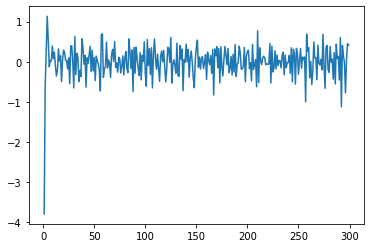

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(iter, devec)